                              1. 
Create a line graph showing the development in poverty over time in both Argentina, Ivory cost, USA.

input: Getting a CSV file from the internet from: 
       https://data.worldbank.org/indicator/SI.POV.DDAY
       

In [1]:
import requests
url = 'https://data.worldbank.org/indicator/SI.POV.DDAY?downloadformat=csv'
response = requests.get(url)

print(response.headers)

{'Server': 'nginx', 'Date': 'Sun, 10 Mar 2019 06:57:53 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'X-Powered-By': 'Express', 'X-XSS-Protection': '1', 'ETag': 'W/"c2f5e-vfAtqq6jE7xOBOuopAg9PA"', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'X-Frame-Options': 'DENY', 'X-Proxy-Cache': 'MISS', 'X-Source': 'prod-web2.localdomain.localdomain'}


In [3]:
from glob import glob
# glob is useful in any situation where your program needs to look for a list of files on the filesystem with names matching a pattern. If you need a list of filenames that all have a certain extension, prefix, or any common string in the middle, use glob instead of writing code to scan the directory contents yourself.

local_file = glob('./*API_SI*.csv')[0]
local_file

'.\\API_SI.POV.DDAY_DS2_en_csv_v2_10474275.csv'

In [4]:
%%bash
head ./*API_SI*.csv

==> ./API_SI.POV.DDAY_DS2_en_csv_v2_10474275.csv <==
ï»¿"Data Source","World Development Indicators",

"Last Updated Date","2019-01-30",

"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018",
"Aruba","ABW","Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)","SI.POV.DDAY","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","",
"Afghanistan","AFG","Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)","SI.POV.DDAY","","

In [5]:
%%bash
# sed is a cli application that can filter text from pipeline (inputstream or a file)
# Sed Linux command doesn’t update data. It only sends the changed text to STDOUT

sed '5!d' API_SI.POV.DDAY_DS2_en_csv_v2_10474275.csv  # sed delete all lines except line 5 (sed '5d'

"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018",


In [6]:
import subprocess

In [8]:
cmd = 'sed 5!d {}'.format(local_file).split()
out, err = subprocess.Popen(cmd, stdout=subprocess.PIPE, 
                            stderr=subprocess.STDOUT).communicate()

In [9]:
# Definning the header and decodeing it into a string.
# Since we are getting the output as a byte literal, we have to decode it into string
header_cols = out.splitlines()[0].decode('UTF-8').split(',')
header_cols = [h.replace('"', '') for h in header_cols]
print(header_cols)

['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '']


In [11]:
import subprocess

Getting data from Contrycode: ARG (Argentina), CIV () and USA

In [14]:
cmd = ['grep', '-E', 'ARG|CIV|USA', local_file]
out, err = subprocess.Popen(cmd, stdout=subprocess.PIPE, 
                            stderr=subprocess.STDOUT).communicate()

Defining the lines and decodeing it into a string.

In [13]:
lines = out.decode('UTF-8').splitlines()
lines = [l.split(',') for l in lines]
lines = [[c.replace('"', '') for c in l] for l in lines]
lines

[['Argentina',
  'ARG',
  'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
  'SI.POV.DDAY',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '0.4',
  '',
  '',
  '',
  '',
  '',
  '0',
  '0',
  '',
  '',
  '',
  '1.1',
  '2.1',
  '2.4',
  '2.3',
  '4.1',
  '4.6',
  '4.1',
  '4.6',
  '4.8',
  '5.7',
  '9.4',
  '14',
  '7',
  '5.4',
  '3.9',
  '3.3',
  '2.9',
  '2.6',
  '2.6',
  '1.1',
  '0.9',
  '0.8',
  '0.8',
  '0.7',
  '',
  '0.6',
  '',
  '',
  ''],
 ["Cote d'Ivoire",
  'CIV',
  'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
  'SI.POV.DDAY',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '6.8',
  '3.1',
  '6.8',
  '10.7',
  '',
  '',
  '',
  '22.4',
  '',
  '',
  '19.6',
  '',
  '',
  '25.8',
  '',
  '',
  '',
  '23.2',
  '',
  '',
  '',
  '',
  '',
  '29.1',
  '

<IPython.core.display.Javascript object>


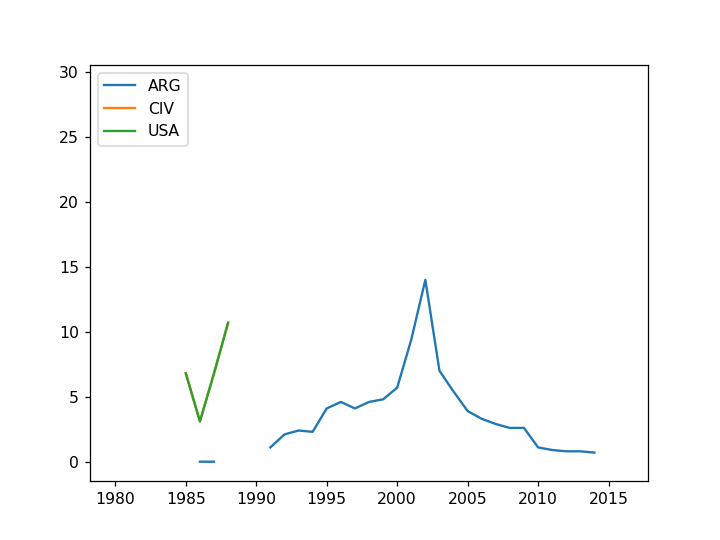

In [24]:
import pandas as pd
import numpy as np

%matplotlib notebook
header_cols[4:-1]
lines[0][4:-1]

ts_arg = pd.Series(lines[0][4:-1], index=np.asarray(header_cols[4:-1], dtype=int))
ts_arg = pd.to_numeric(ts_arg)
ts_arg.loc[1960]
ts_civ = pd.Series(lines[1][4:-1], index=np.asarray(header_cols[4:-1], dtype=int))
ts_civ = pd.to_numeric(ts_civ)
ts_civ.loc[1960]
ts_usa = pd.Series(lines[1][4:-1], index=np.asarray(header_cols[4:-1], dtype=int))
ts_usa = pd.to_numeric(ts_usa)
ts_usa.loc[1960]
ts = pd.concat([ts_arg, ts_civ, ts_usa], axis=1, keys=['ARG', 'CIV', 'USA']) # axis=0 is default (concats like sql UNION) axis=1 concats the data along the x axis
ts.plot()


                                     2.
Find the 10 countries with the highest poverty rate, and plot the rates in a bar chart.
Based on Year 2018 and Countrys with a number higher than 0.

In [2]:
import pandas as pd
expenditures = pd.read_csv(expenditure_csv, skiprows=4)
expenditures

NameError: name 'expenditure_csv' is not defined

In [28]:
expenditures.index

RangeIndex(start=0, stop=264, step=1)

In [29]:
expenditures.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Unnamed: 63'],
      dtype='object')

In [32]:
expenditures.values([])

array([['Aruba', 'ABW',
        'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
        ..., nan, nan, nan],
       ['Afghanistan', 'AFG',
        'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
        ..., nan, nan, nan],
       ['Angola', 'AGO',
        'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
        ..., nan, nan, nan],
       ...,
       ['South Africa', 'ZAF',
        'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
        ..., nan, nan, nan],
       ['Zambia', 'ZMB',
        'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
        ..., nan, nan, nan],
       ['Zimbabwe', 'ZWE',
        'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
        ..., nan, nan, nan]], dtype=object)

In [ ]:
expenditures.iloc[]

                                     3.
Show the development of absolute poverty in all the central american countries:
Belize(BLZ), Costa Rica(CRI), El Salvador(SLV), Guatemala(GTM), Honduras(HND), Nicaragua(NIC),
Panama(PAN)

A. A description of what graphical representation you think is best for this task:
I have chosen a pie-chart because it is a very visuel way to immediately see the differences between the countries. 

B. The actual graphical representation in a Jupyter Notebook 

In [30]:
#Belize(BLZ), Costa Rica(CRI), El Salvador(SLV), Guatemala(GTM), Honduras(HND), Nicaragua(NIC),
#Panama(PAN)
df = expenditures
df[df['Country Code'].isin(['BLZ', 'CRI', 'SLV', 'GTM', 'HND', 'NIC', 'PAN'])]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
24,Belize,BLZ,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Costa Rica,CRI,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,1.5,1.6,1.6,1.6,1.4,1.5,1.3,NaN,NaN,NaN
90,Guatemala,GTM,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.7,NaN,NaN,NaN,NaN,NaN
95,Honduras,HND,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,15.0,17.1,19.6,17.3,15.9,16.2,16.0,NaN,NaN,NaN
173,Nicaragua,NIC,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.2,NaN,NaN,NaN,NaN,NaN
183,Panama,PAN,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,4.5,3.0,4.2,2.8,3.5,2.0,2.2,NaN,NaN,NaN
209,El Salvador,SLV,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,5.5,4.5,4.1,3.2,3.0,1.9,2.2,NaN,NaN,NaN


In [37]:
expenditures.iloc[24]
expenditures.iloc[46]
expenditures.iloc[90]
expenditures.iloc[95]
expenditures.iloc[173]
expenditures.iloc[183]
expenditures.iloc[209]

Country Name                                            El Salvador
Country Code                                                    SLV
Indicator Name    Poverty headcount ratio at $1.90 a day (2011 P...
Indicator Code                                          SI.POV.DDAY
1960                                                            NaN
1961                                                            NaN
1962                                                            NaN
1963                                                            NaN
1964                                                            NaN
1965                                                            NaN
1966                                                            NaN
1967                                                            NaN
1968                                                            NaN
1969                                                            NaN
1970                                            

                                     4.
From the worldbank api, find one more interesting question you would like to ask.
A. A description of why that question is interesting:

B. A visualisation of the question in your Jupyter Notebook
